<a href="https://colab.research.google.com/github/ml-unison/ml-unison.github.io/blob/main/ejemplos/intro-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Vamos a practicar

Para esta practica vamos a usar un conjunto de datos de la revista *wine magazine*,
donde revisan una cantidad bastante sorprendente de vinos.

Una descripción de la base de datos la encuentras [aquí](https://www.kaggle.com/zynicide/wine-reviews).
Para no tener que descargar los datos a mano, se anexa la dirección `url` de donde se pueden descargar.

Es importante notr que la primer columna del archivo `csv` es el índice (usar `index_col=0` cuando se descargue el archivo con `pd.read_csv`).

Una vez descargado, usar pandas para las siguientes tareas:

1. ¿Cuantas variables tiene el dataframe? ¿Qué variables tienen valores perdidos? ¿Qué variables son numéricas? ¿Qué variables son cualitativas?
2. Hacer un dataframe con únicamente vinos europeos.
3. ¿Cuál es el menor, el mayor y el precio promedio de la botella por país? ¿De que país es la botella de menor precio?
4. ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
5. ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
6. Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares.
7. ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?


In [95]:
!pip install country_converter
!pip install pycountry_convert

In [96]:
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt
import plotly.express as px

winmag_url = 'https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv'

In [97]:
df = pd.read_csv(winmag_url, engine='python', index_col=0)
display(df)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65494,France,Made from young vines from the Vaulorent porti...,Fourchaume Premier Cru,90,45.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,William Fèvre 2005 Fourchaume Premier Cru (Ch...,Chardonnay,William Fèvre
65495,Australia,"This is a big, fat, almost sweet-tasting Caber...",NaN,90,22.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Tapestry 2005 Cabernet Sauvignon (McLaren Vale),Cabernet Sauvignon,Tapestry
65496,US,"Much improved over the unripe 2005, Fritz's 20...",Estate,90,20.0,California,Dry Creek Valley,Sonoma,NaN,NaN,Fritz 2006 Estate Sauvignon Blanc (Dry Creek V...,Sauvignon Blanc,Fritz
65497,US,This wine wears its 15.8% alcohol better than ...,Block 24,90,31.0,California,Napa Valley,Napa,NaN,NaN,Hendry 2004 Block 24 Primitivo (Napa Valley),Primitivo,Hendry


In [98]:
# ¿Cuantas variables tiene el dataframe?
df.shape[1]

13

In [99]:
# ¿Qué variables tienen valores perdidos?
df.columns[df.isna().any()].to_list()

['country',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle']

In [100]:
# ¿Qué variables son numéricas?
df.select_dtypes(include='number').columns.to_list()

['points', 'price']

In [101]:
# ¿Qué variables son cualitativas?
df.select_dtypes(include='object').columns.to_list()

['country',
 'description',
 'designation',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [102]:
# Hacer un dataframe con únicamente vinos europeos.

# Funciones auxiliares
def country_name_to_continent_name(country_name: str) -> str:
  try:
      country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
      return pc.country_alpha2_to_continent_code(country_code)
  except KeyError:
      return 'Unknown'

def check_if_in_eu(row) -> bool:
  return country_name_to_continent_name(row['country']) == 'EU'

In [103]:
# Vamos a cambiar los valores nan de la columna country por "unknown"
df_eu = df.fillna('unknown', inplace=False)
# Tambien vamos a reemplazar los campos "US" por "United States"
df_eu.replace('US', 'United States', inplace=True)

In [104]:
# Por ultimo, filtramos el dataframe utilizando el metodo apply pasando como argumento la funcion creada anteriormente
df_eu = df_eu[df_eu.apply(check_if_in_eu, axis=1)]
df_eu['country']

,country
0,Italy
1,Portugal
5,Spain
6,Italy
7,France
...,...
65486,France
65491,France
65492,France
65494,France


In [105]:
# ¿Cuál es el menor, el mayor y el precio promedio de la botella por país?
min_price = df.groupby('country')['price'].min().reset_index(name='price')
max_price = df.groupby('country')['price'].max().reset_index(name='price')
mean_price = df.groupby('country')['price'].mean().reset_index(name='price')

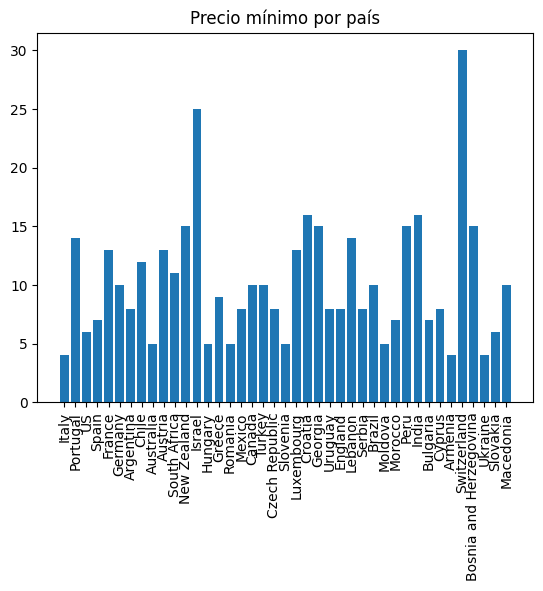

In [106]:
heights = min_price['price'].tolist()

plt.bar(df['country'].drop_duplicates().dropna(), heights)
plt.title("Precio mínimo por país")
plt.xticks(rotation=90)
plt.show()

In [107]:
fig = px.choropleth(min_price, locations='country', locationmode='country names',
                    color='price',
                    color_continuous_scale='Viridis',
                    title='Mapa del mundo coloreado por precio mínimo')

fig.show()

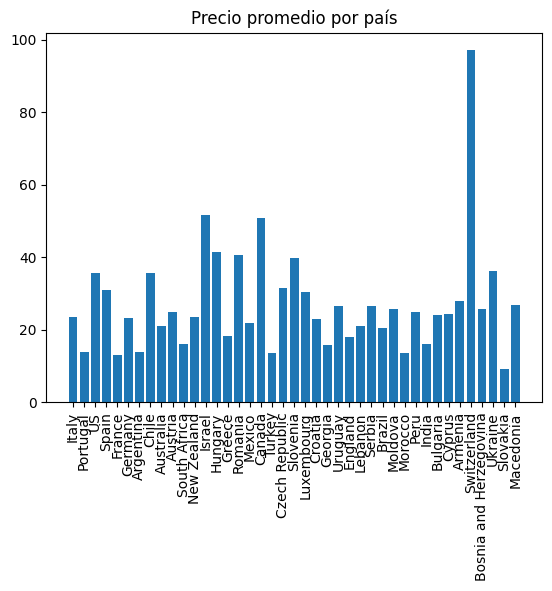

In [108]:
heights = mean_price['price'].tolist()

plt.bar(df['country'].drop_duplicates().dropna(), heights)
plt.title("Precio promedio por país")
plt.xticks(rotation=90)
plt.show()

In [109]:
fig = px.choropleth(mean_price, locations='country', locationmode='country names',
                    color='price',
                    color_continuous_scale='Viridis',
                    title='Mapa del mundo coloreado por precio promedio')

fig.show()

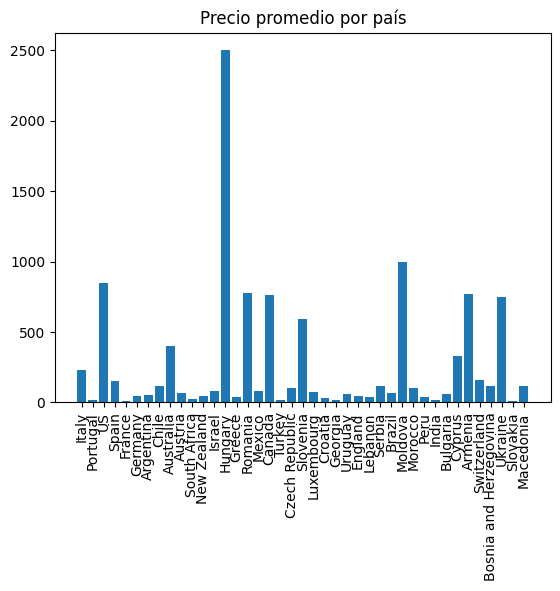

In [110]:
heights = max_price['price'].tolist()

plt.bar(df['country'].drop_duplicates().dropna(), heights)
plt.title("Precio promedio por país")
plt.xticks(rotation=90)
plt.show()

In [111]:
fig = px.choropleth(max_price, locations='country', locationmode='country names',
                    color='price',
                    color_continuous_scale='Viridis',
                    title='Mapa del mundo coloreado por precio máximo')

fig.show()

In [112]:
# ¿De que país es la botella de menor precio?
df.loc[df.price.idxmin(), 'country']

'Spain'

In [113]:
# ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
strawberry_wines = df[df.description.str.contains(r'strawberry')]
print(f"Vinos con aroma a fresa: {strawberry_wines.shape[0]}")

Vinos con aroma a fresa: 1992


In [114]:
# ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
unique_designations = df.designation.unique()
print(f"Designaciones unicas: {unique_designations.shape[0]}")
most_repeated_designation = df.designation.value_counts().idxmax()
print(f"Designación más repetida: {most_repeated_designation}")
count_most_repeated_designation = df.designation.value_counts().max()
print(f"Veces que se repite: {count_most_repeated_designation}")

Designaciones unicas: 24188
Designación más repetida: Reserve
Veces que se repite: 999


In [115]:
# Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares
df1 = df[df.price < 20][['variety', 'country', 'price']]
df1

,variety,country,price
1,Portuguese Red,Portugal,15.0
2,Pinot Gris,US,14.0
3,Riesling,US,13.0
5,Tempranillo-Merlot,Spain,15.0
6,Frappato,Italy,16.0
...,...,...,...
65456,Cabernet Sauvignon,US,11.0
65472,Chardonnay,US,19.0
65481,Malbec,Argentina,11.0
65482,Cabernet Sauvignon,Australia,17.0


In [116]:
# ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?
df2 = df[df.variety == 'Pinot Noir'].groupby('country')['variety'].value_counts()
df2

,,count
country,variety,
Argentina,Pinot Noir,46
Australia,Pinot Noir,58
Austria,Pinot Noir,51
Brazil,Pinot Noir,2
Bulgaria,Pinot Noir,9
Canada,Pinot Noir,8
Chile,Pinot Noir,184
Croatia,Pinot Noir,1
England,Pinot Noir,5


In [117]:
# APORTE PROPIO
# Quien es el critico que mas resenas ha publicado
df.groupby('taster_name')['taster_name'].count().sort_values(ascending=False).head(1)

,taster_name
taster_name,
Roger Voss,13045


In [118]:
# Distribucion de paises de los que provienen los vinos que mas prueba Roger Voss

roger_df = df[df.taster_name == 'Roger Voss'].groupby('country')['country'].value_counts().reset_index(name='count')

fig = px.choropleth(roger_df, locations='country', locationmode='country names',
                    color='count',
                    color_continuous_scale='Viridis',
                    title='Mapa del mundo coloreado por reseñas de Roger Voss')

fig.show()

In [119]:
# Quien es el crítico con mayor distribución de origines de vinos (Quien ha probado vinos de más países diferentes)
df.groupby('taster_name')['country'].nunique().sort_values(ascending=False).head(1)

,country
taster_name,
Anna Lee C. Iijima,15


In [120]:
anna_df = df[df.taster_name == 'Anna Lee C. Iijima'].groupby('country')['country'].value_counts().reset_index(name='count')

fig = px.choropleth(anna_df, locations='country', locationmode='country names',
                    color='count',
                    color_continuous_scale='Viridis',
                    title='Mapa del mundo coloreado por reseñas de Anna Lee C. Iijima')

fig.show()